# I use this notebook to explore the models I have trained

## Visualization 

Using t-SNE and UMAP to visualize the data distribution of generated embeddings

#### miscellaneous

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap
import argparse

class plot_umap():
  def __init__(data_input = None):
    if type(data_input) == str:
      print(f"the input data is the path of csv file: {data_input}")
      data = pd.read_csv(data_input, index_col=0)
      raise NotImplemented("the parsing method has not been completed!")
      
    elif type(class_labels)==np.ndarray:
      print("get raw data in np.array format")
      self.data = data_input

    else:
      self.data = None

  def plot_umap(dim = 3):
    reducer = umap.UMAP(n_components=dim)
    data = reducer.fit_transform(self.data)
    # 绘制三维图
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2])
    plt.show()


# if __name__ == "__main__":
#     parser = argparse.ArgumentParser(description='argparse testing')
#     parser.add_argument('--dimension', '-d', type=int, default=3, help="the dimension of plot")
#     parser.add_argument('--data_input', '-s', type=str,  required= True, help='the path of input data')
#     parser.add_argument('--body', '-b', type=str, default="Hello world!!!")

#     args = parser.parse_args()
#     plot = plot_umap(args.data_input)
#     plot.plot_umap(dim = args.dimension)


def plot(get_text_embedding, prompt, title = None):
  text_features = get_text_embedding
  similarity_matrix = torch.mm(text_features, text_features.t())
  text_features /= text_features.norm(dim=-1, keepdim=True)
  # text_features = text_features.detach().numpy()
  similarity = (1 * text_features @ text_features.T)
  print(similarity.shape)
  similarity=similarity.cpu().detach().numpy()
  # data = similarity_matrix.cpu().numpy()
  # data.shape

  plt.figure(figsize=(8, 5))
  plt.imshow(similarity)
  plt.colorbar()
  plt.yticks(range(13), prompt, fontsize=7)
  plt.xticks(range(13), prompt, fontsize=7, rotation=40)
  # for i, image in enumerate(text):
  #     plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
  for x in range(similarity.shape[1]):
      for y in range(similarity.shape[0]):
          plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=8)

  for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

  # plt.xlim([-0.5, 4 - 0.5])
  # plt.ylim([4 + 0.5, -2])
  print(len(similarity))
  avg_sim = (np.sum(similarity) - len(similarity))/(len(similarity)*(len(similarity)-1))
  title = "Cosine similarity between text and text features CLIP TEXT encoder" if title is None else title
  plt.title(title + f" : avg_sim: {avg_sim}", size=20)


#### scatter plot of FG+Biomed ， text embedding

the prompts I used in prediction:
['images for Atelectasis', 'images for Cardiomegaly', 'images for Consolidation', 'images for Edema', 'images for Enlarged Cardiomediastinum', 'images for Fracture', 'images for Lung Lesion', 'images for Lung Opacity', 'images for No Finding', 'images for Pleural Effusion', 'images for Pleural Other', 'images for Pneumonia', 'images for Pneumothorax']
dict_keys(['img_embeds', 'text_embeds', 'logits_per_image', 'loss_value', 'logits_per_text'])
dict_keys(['logits', 'loss_value'])
dict_keys(['text_embeds', 'loss_value', 'multi_logits_per_text'])
torch.Size([13, 1, 512])
torch.Size([13, 512])
is the same in each output False


e:\Anaconda\envs\biomedCLIP\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


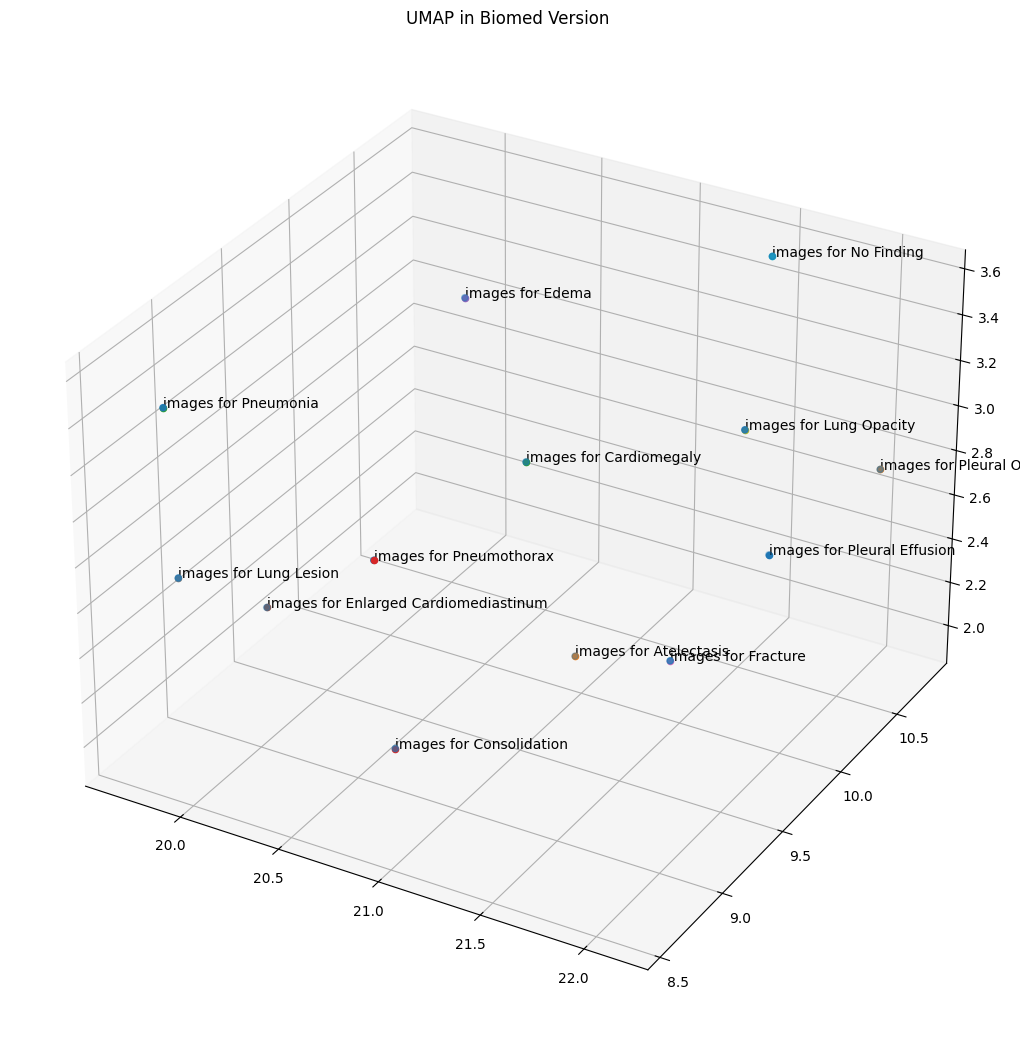

torch.Size([13, 13])
13


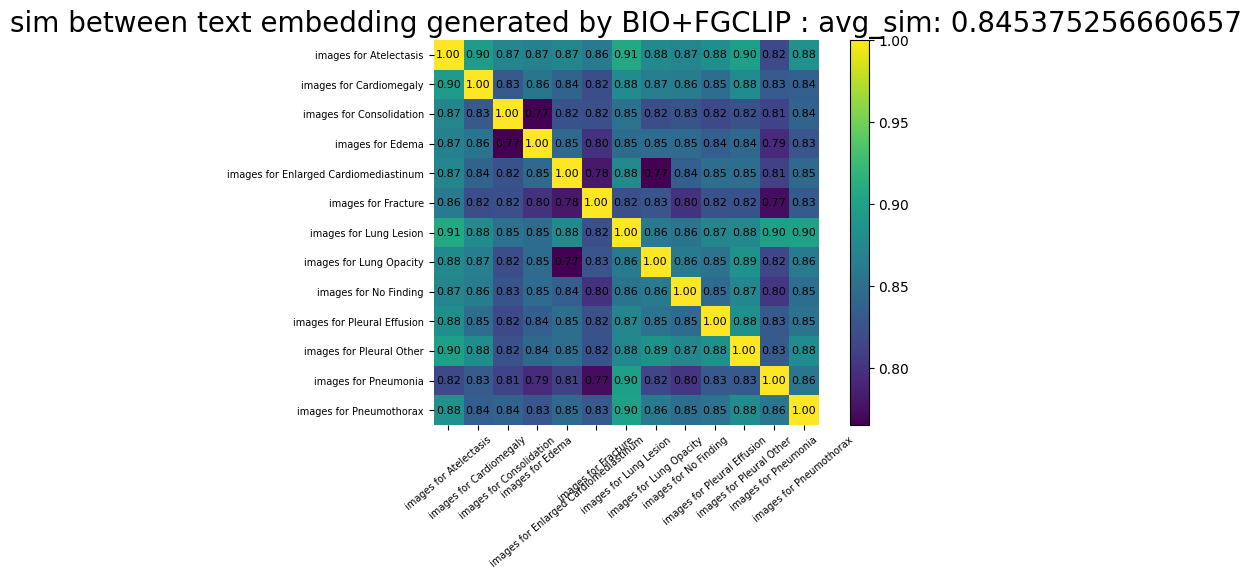

In [118]:
%matplotlib inline
from cgi import test
import torch
from models import MultiTaskModel   
import constants as _constants_
import  matplotlib.pyplot as plt
import umap


random_seed = 42
model = MultiTaskModel()

# the model class: 你所定义的模型的class
model.load_state_dict(torch.load(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\checkpoint_biomedCLIP\best\pytorch_model.bin"))
# print(model.eval())

prompt = _constants_.BASIC_PROMPT
print(f"the prompts I used in prediction:\n{prompt}")
image_path = ["D:\\exchange\\ShanghaiTech\\learning\\code\\diagnosisP\\x_ray_constrastive\\imgs\\structure.png"]
label = torch.tensor([1,1,2,1,2,1,1,2,1,0,0,2,1])
model.cuda()
contrastive_mode, classifier, orthogonal = model(prompt, image_path, label)
print(contrastive_mode.keys())
print(classifier.keys())
print(orthogonal.keys())
text_embedding = orthogonal['text_embeds']
print(text_embedding.shape)
text_embedding = text_embedding.squeeze()
print(text_embedding.shape)
print(_constants_.RED + "is the same in each output" + _constants_.RESET, test == text_embedding)
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3, random_state=random_seed)
embedding = reducer.fit_transform(text_embedding.cpu().detach().numpy())

# 提取降维后的坐标
x = embedding[:, 0]
y = embedding[:, 1]
z = embedding[:, 2]
labels = _constants_.BASIC_PROMPT

# plt.scatter(x, y, z)
# for i in range(len(labels)):
#     plt.annotate(labels[i], (x[i], y[i], z[i]))  # 在点旁边添加标签

# plt.title("UMAP Projection of Data with Labels using the data of trained model")
# plt.grid()
# plt.show()
fig = plt.figure(figsize=(19, 13))
ax = fig.add_subplot(111, projection = '3d')

ax.set_title("UMAP in Biomed Version ")
ax.scatter(x, y, z)
for i in range(len(embedding)):
  ax.scatter(embedding[i, 0], embedding[i, 1], embedding[i, 2])
  ax.text(embedding[i, 0], embedding[i, 1], embedding[i, 2], prompt[i])

plt.show()

plot(text_embedding.cpu(),prompt, "sim between text embedding generated by BIO+FGCLIP")

#### the  plot of text embeddings generated by FG_CLIP + BiomedCLIP

in current image branch, the vis backbone for vis embedding is: biomedclip
in current Text branch, the text backbone for text embedding is: biomedclip
the prompts I used in prediction:
['images for Atelectasis', 'images for Cardiomegaly', 'images for Consolidation', 'images for Edema', 'images for Enlarged Cardiomediastinum', 'images for Fracture', 'images for Lung Lesion', 'images for Lung Opacity', 'images for No Finding', 'images for Pleural Effusion', 'images for Pleural Other', 'images for Pneumonia', 'images for Pneumothorax']


d:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\models.py:287: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_feature = torch.tensor(text_feature)


dict_keys(['img_embeds', 'text_embeds', 'logits_per_image', 'loss_value'])
 the key in classifier:  dict_keys(['logits', 'loss_value']) 
 the keys in orthonogal module:  dict_keys(['text_embeds', 'loss_value', 'multi_logits_per_text']) 
torch.Size([13, 512])
the shape of text embedding: torch.Size([13, 512])


e:\Anaconda\envs\biomedCLIP\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


2023-11-11 10:36:36
-1.14644 -0.47784758 0.7563758
0.7676678 -0.4397068 0.2250495
-0.5900178 0.33713293 -1.2394342
1.572772 0.32295752 -0.014159679
0.730351 0.11766243 0.94229794
-0.7840638 -0.4447155 -1.0813031
-0.64733124 -0.9161515 -0.08863163
0.96870756 0.38199234 -0.72105646
1.2410765 0.92806196 0.41316032
-0.3071866 0.1499691 0.561553
-0.3709855 -0.9373789 0.80290604
-1.2751327 0.12907743 0.08309555
-0.15942478 0.8489418 -0.63985634


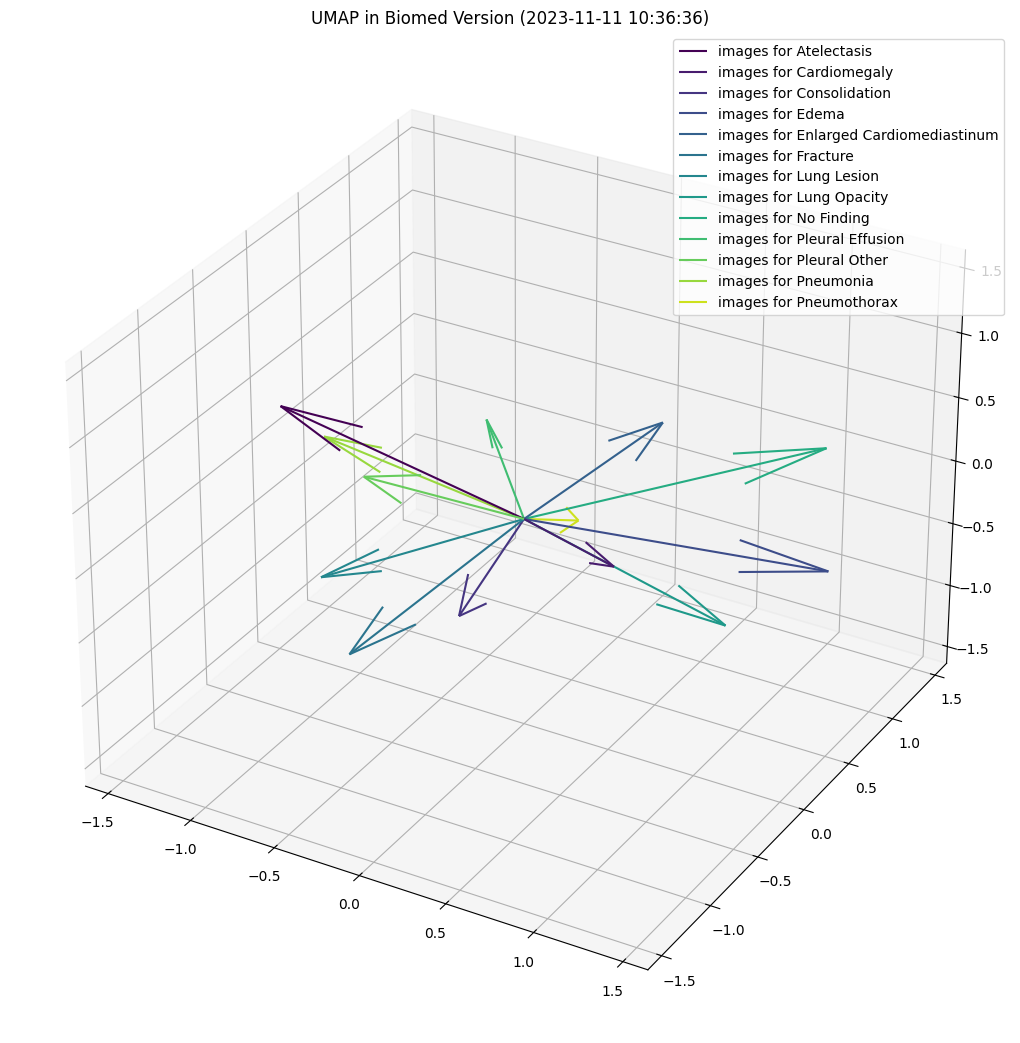

torch.Size([13, 13])
13


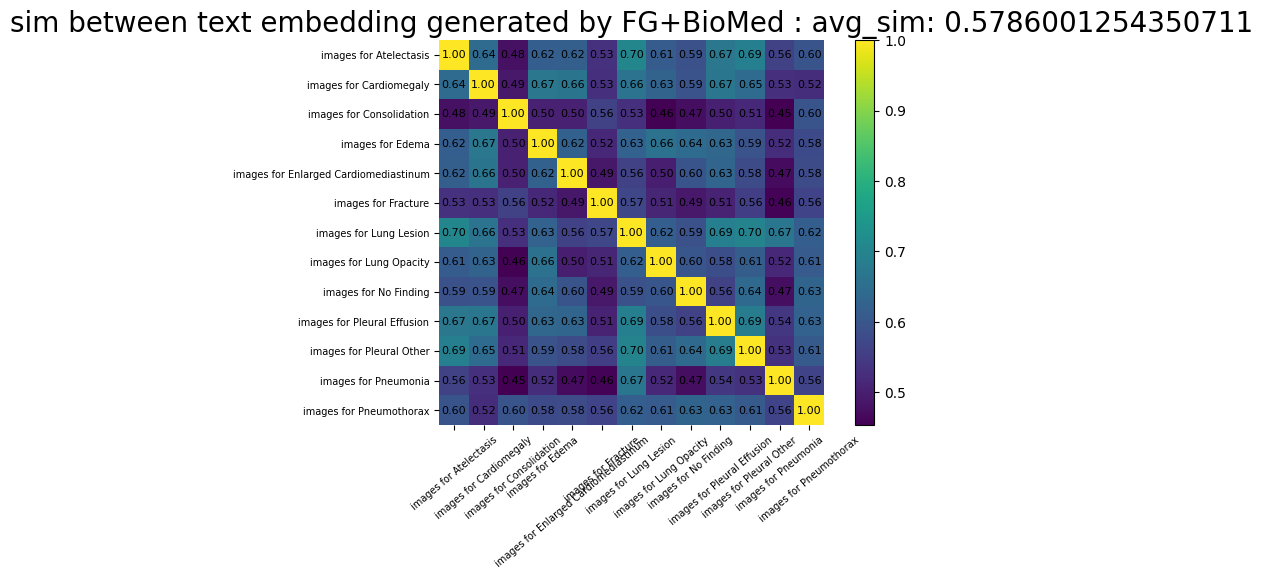

In [11]:
%matplotlib inline
import torch
from models import MultiTaskModel   
import constants as _constants_
import  matplotlib.pyplot as plt
import umap
import numpy as np
import matplotlib.pyplot as plt
model = MultiTaskModel(nntype="biomedclip")
random_seed = 42
# the model class: 你所定义的模型的class
model.load_state_dict(torch.load(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\checkpoint_11_11_bio\best\pytorch_model.bin"))
# print(model.eval())

prompt = _constants_.BASIC_PROMPT
print(f"the prompts I used in prediction:\n{prompt}")
image_path = ["D:\\exchange\\ShanghaiTech\\learning\\code\\diagnosisP\\x_ray_constrastive\\imgs\\structure.png"]
label = torch.tensor([1,1,2,1,2,1,1,2,1,0,0,2,1])
model.cuda()
contrastive_mode, classifier, orthogonal = model(prompt, image_path, label)
print(contrastive_mode.keys())
print(_constants_.RED, "the key in classifier: ", classifier.keys(), _constants_.RESET)
print(_constants_.RED, "the keys in orthonogal module: ", orthogonal.keys(), _constants_.RESET)
text_embedding = orthogonal['text_embeds']
print(text_embedding.shape)
text_embedding = text_embedding.squeeze()
print(f"the shape of text embedding: {text_embedding.shape}")
# print(_constants_.RED + "is the same in each output" + _constants_.RESET, test == text_embedding)
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3, random_state=random_seed)
from sklearn.preprocessing import StandardScaler  # 导入标准化工具
scaler = StandardScaler()
text_embedding_1 = scaler.fit_transform(text_embedding.cpu().detach().numpy())

embedding = reducer.fit_transform(text_embedding_1)

# 计算均值
mean_x = np.mean(embedding[:, 0])
mean_y = np.mean(embedding[:, 1])
mean_z = np.mean(embedding[:, 2])

# 平移所有点，使原点位于中心
embedding_centered = embedding - [mean_x, mean_y, mean_z]

fig = plt.figure(figsize=(19, 13))
ax = fig.add_subplot(111, projection='3d')
import datetime

current_datetime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(current_datetime)
ax.set_title(f"UMAP in Biomed Version ({current_datetime})")

# 使用 ax.quiver 绘制三维向量
for i in range(len(embedding)):
    x_start = 0  # 起点 x 坐标
    y_start = 0  # 起点 y 坐标
    z_start = 0  # 起点 z 坐标

    x_vector = embedding_centered[i, 0]  # x 方向上的分量
    y_vector = embedding_centered[i, 1]  # y 方向上的分量
    z_vector = embedding_centered[i, 2]  # z 方向上的分量

    # ax.quiver(x_start, y_start, z_start, x_vector, y_vector, z_vector)
    color = plt.cm.viridis(i / len(embedding_centered))  # 根据索引设置颜色
    ax.quiver(x_start, y_start, z_start, x_vector, y_vector, z_vector, color=color, label=prompt[i])

    print(x_vector, y_vector, z_vector)

    # ax.text(embedding[i, 0], embedding[i, 1], embedding[i, 2], prompt[i])
max_range = np.max(np.abs(embedding_centered))
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range ])
ax.set_zlim([-max_range, max_range])
ax.legend()
# plt.grid()
plt.show()


plot(text_embedding.cpu(),prompt, "sim between text embedding generated by FG+BioMed")


#### the plot of text embedding generated by original BiomedCLIP

e:\Anaconda\envs\biomedCLIP\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


-0.28575134 -0.9589844 -0.51192427
0.13096523 -0.4153452 1.2265539
-0.61247253 0.45599556 -0.5545459
-0.21875381 0.50117874 1.3005514
0.8836374 0.10389042 1.2063279
-0.81264114 -0.7082958 0.29212666
0.38559723 0.08133888 -0.829761
-1.097332 0.1620779 0.012569904
-0.7449322 0.9300108 0.6745987
0.69512653 -1.1596413 -0.4781618
0.3484373 -0.81655407 -1.2798269
1.0142889 0.73870087 -0.86407185
0.31381607 1.085618 -0.19443607


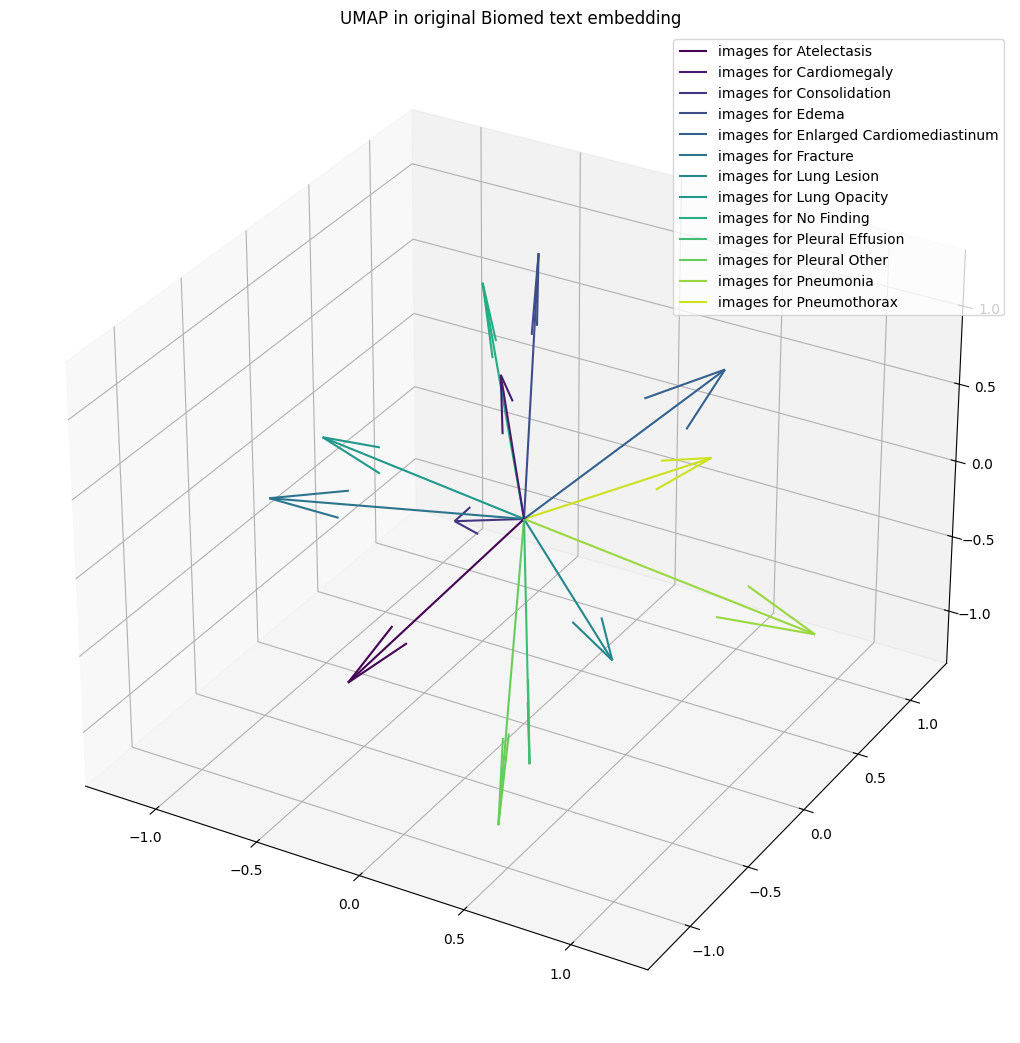

torch.Size([13, 13])
13


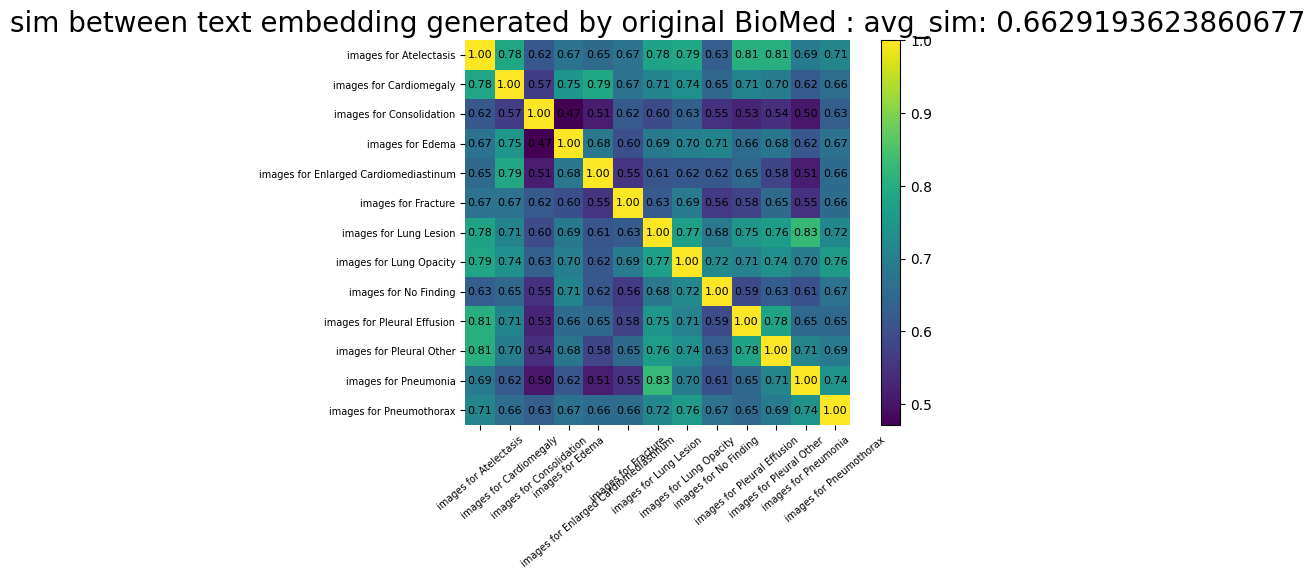

In [120]:
import glob
from collections import OrderedDict

import torch
from PIL import Image
import open_clip
import constants as _constants_
prompt = _constants_.BASIC_PROMPT
model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
tokenizer = open_clip.get_tokenizer('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.eval()
test_imgs = [r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\imgs\structure.png", r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\imgs\structure.png"]
context_length = 256
texts = tokenizer(prompt, context_length=context_length).to(device)
images = torch.stack([preprocess_val(Image.open(img)) for img in test_imgs]).to(device)
with torch.no_grad():
    image_features, text_features, logit_scale = model(images, texts)



reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3, random_state=random_seed)
from sklearn.preprocessing import StandardScaler  # 导入标准化工具
scaler = StandardScaler()
text_embedding = scaler.fit_transform(text_features.cpu().detach().numpy())

embedding = reducer.fit_transform(text_embedding)

# 计算均值
mean_x = np.mean(embedding[:, 0])
mean_y = np.mean(embedding[:, 1])
mean_z = np.mean(embedding[:, 2])

# 平移所有点，使原点位于中心
embedding_centered = embedding - [mean_x, mean_y, mean_z]

fig = plt.figure(figsize=(19, 13))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("UMAP in original Biomed text embedding")

# 使用 ax.quiver 绘制三维向量
for i in range(len(embedding)):
    x_start = 0  # 起点 x 坐标
    y_start = 0  # 起点 y 坐标
    z_start = 0  # 起点 z 坐标

    x_vector = embedding_centered[i, 0]  # x 方向上的分量
    y_vector = embedding_centered[i, 1]  # y 方向上的分量
    z_vector = embedding_centered[i, 2]  # z 方向上的分量

    # ax.quiver(x_start, y_start, z_start, x_vector, y_vector, z_vector)
    color = plt.cm.viridis(i / len(embedding_centered))  # 根据索引设置颜色
    ax.quiver(x_start, y_start, z_start, x_vector, y_vector, z_vector, color=color, label=prompt[i])

    print(x_vector, y_vector, z_vector)

    # ax.text(embedding[i, 0], embedding[i, 1], embedding[i, 2], prompt[i])
max_range = np.max(np.abs(embedding_centered))
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range ])
ax.set_zlim([-max_range, max_range])
ax.legend()
# plt.grid()
plt.show()


plot(text_features.cpu(),prompt, "sim between text embedding generated by original BioMed")



#### text embedding generated by FG_CLIP + CLIP

in current image branch, the vis backbone for vis embedding is: clip
in current Text branch, the text backbone for text embedding is: clip
dict_keys(['img_embeds', 'text_embeds', 'logits_per_image', 'loss_value'])
dict_keys(['logits', 'loss_value'])
dict_keys(['text_embeds', 'loss_value', 'multi_logits_per_text'])
torch.Size([13, 512])
torch.Size([13, 512])


e:\Anaconda\envs\biomedCLIP\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([13, 13])
13


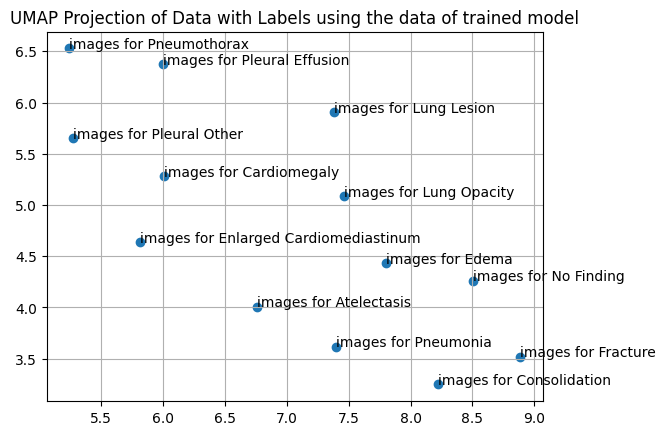

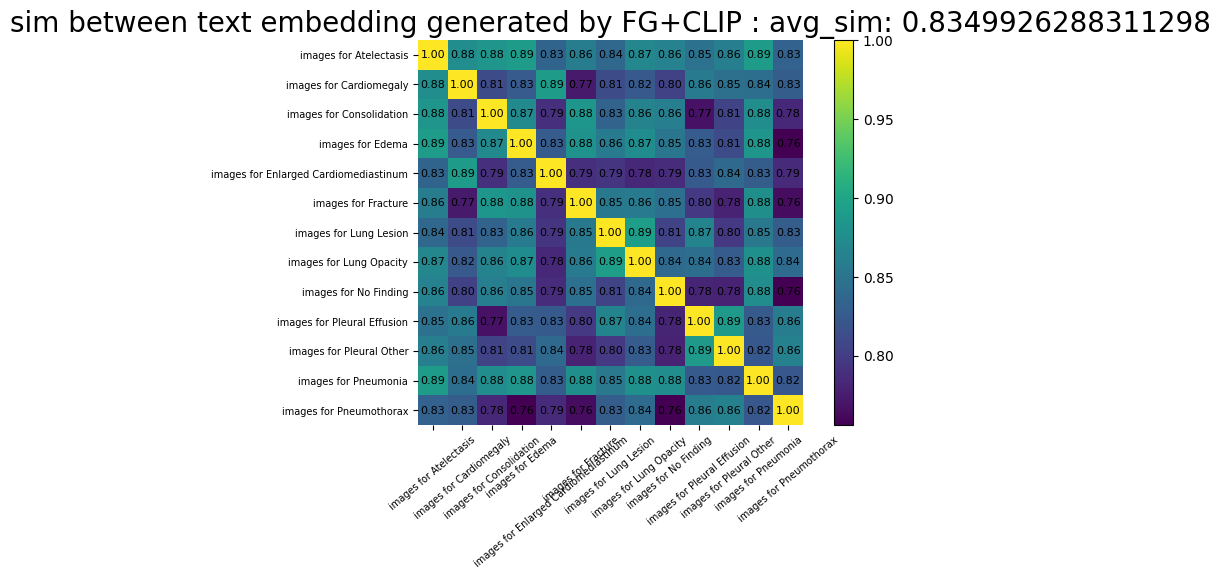

In [10]:
import torch
from models import MultiTaskModel   
import constants as _constants_
import  matplotlib.pyplot as plt
import umap
import numpy as np


def plot(get_text_embedding, prompt, title = None):
  text_features = get_text_embedding
  similarity_matrix = torch.mm(text_features, text_features.t())
  text_features /= text_features.norm(dim=-1, keepdim=True)
  # text_features = text_features.detach().numpy()
  similarity = (1 * text_features @ text_features.T)
  print(similarity.shape)
  similarity=similarity.cpu().detach().numpy()
  # data = similarity_matrix.cpu().numpy()
  # data.shape

  plt.figure(figsize=(8, 5))
  plt.imshow(similarity)
  plt.colorbar()
  plt.yticks(range(13), prompt, fontsize=7)
  plt.xticks(range(13), prompt, fontsize=7, rotation=40)
  # for i, image in enumerate(text):
  #     plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
  for x in range(similarity.shape[1]):
      for y in range(similarity.shape[0]):
          plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=8)

  for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

  # plt.xlim([-0.5, 4 - 0.5])
  # plt.ylim([4 + 0.5, -2])
  print(len(similarity))
  avg_sim = (np.sum(similarity) - len(similarity))/(len(similarity)*(len(similarity)-1))
  title = "Cosine similarity between text and text features CLIP TEXT encoder" if title is None else title
  plt.title(title + f" : avg_sim: {avg_sim}", size=20)
  # plot.show()

model = MultiTaskModel()

# the model class: 你所定义的模型的class
model.load_state_dict(torch.load(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\checkpoint_11_4_base\10000\pytorch_model.bin"))
# print(model.eval())

prompt = _constants_.BASIC_PROMPT
image_path = ["D:\\exchange\\ShanghaiTech\\learning\\code\\diagnosisP\\x_ray_constrastive\\imgs\\structure.png"]
label = torch.tensor([1,1,2,1,2,1,1,2,1,0,0,2,1])
model.cuda()
contrastive_mode, classifier, orthogonal = model(prompt, image_path, label)
print(contrastive_mode.keys())
print(classifier.keys())
print(orthogonal.keys())
text_embedding = orthogonal['text_embeds']
print(text_embedding.shape)
text_embedding = text_embedding.squeeze()
print(text_embedding.shape)

reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
embedding = reducer.fit_transform(text_embedding.cpu().detach().numpy())

# 提取降维后的坐标
x = embedding[:, 0]
y = embedding[:, 1]
labels = _constants_.BASIC_PROMPT

plt.scatter(x, y)
for i in range(len(labels)):
    plt.annotate(labels[i], (x[i], y[i]))  # 在点旁边添加标签

plt.title("UMAP Projection of Data with Labels using the data of trained model")
plt.grid()

plot(text_embedding.cpu(),prompt, "sim between text embedding generated by FG+CLIP")
plt.show()

#### text embedding generated by Original CLIP

torch.Size([13, 77])
torch.Size([13, 512])
torch.Size([13, 13])
torch.Size([13, 77])
torch.Size([13, 512])


e:\Anaconda\envs\biomedCLIP\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


0.7631583 0.48305082 -0.16453648
-0.14962125 -0.4476776 -1.0421069
1.1175852 1.4484448 0.06295252
-0.18407273 0.5567548 -0.11477566
-0.8676374 -0.65649986 -0.8016443
1.199676 1.2241085 -0.81408215
-0.27006745 -1.1891093 -0.04088688
0.4702096 -0.5437193 0.3733132
1.8012362 1.1983962 -0.21304393
-1.3214886 -1.0185285 0.28586054
-0.828815 -0.71235037 0.9643471
-0.17549658 -0.05663109 0.9889569
-1.5546653 -0.28624058 0.5156486


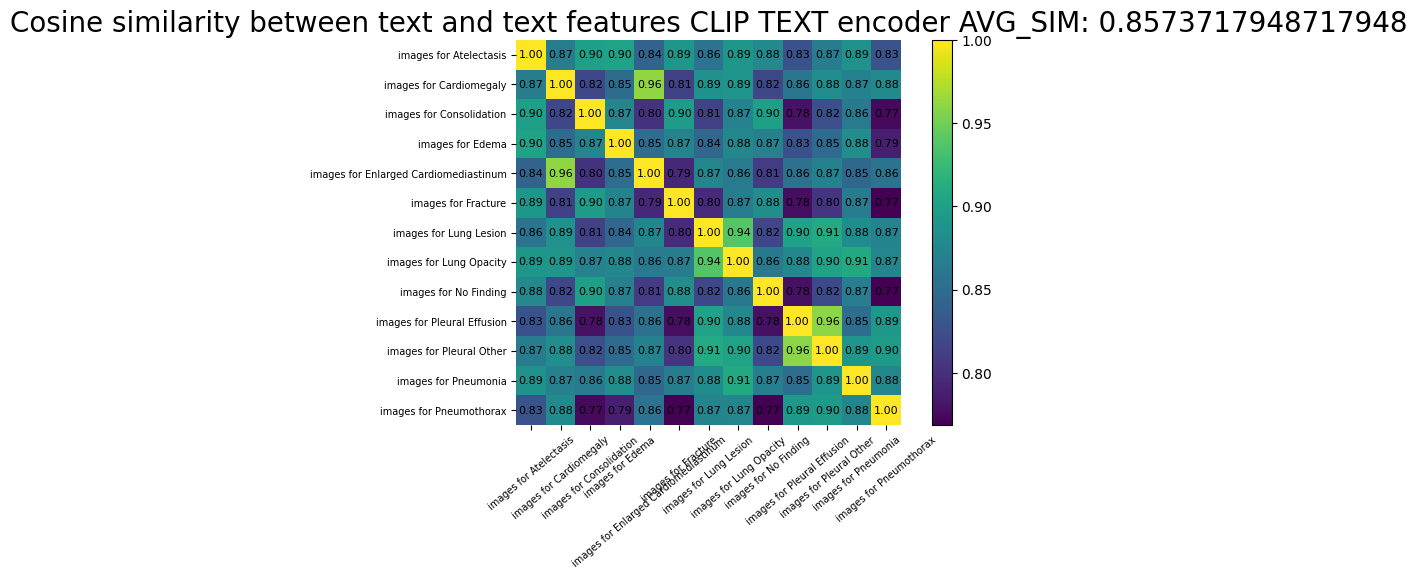

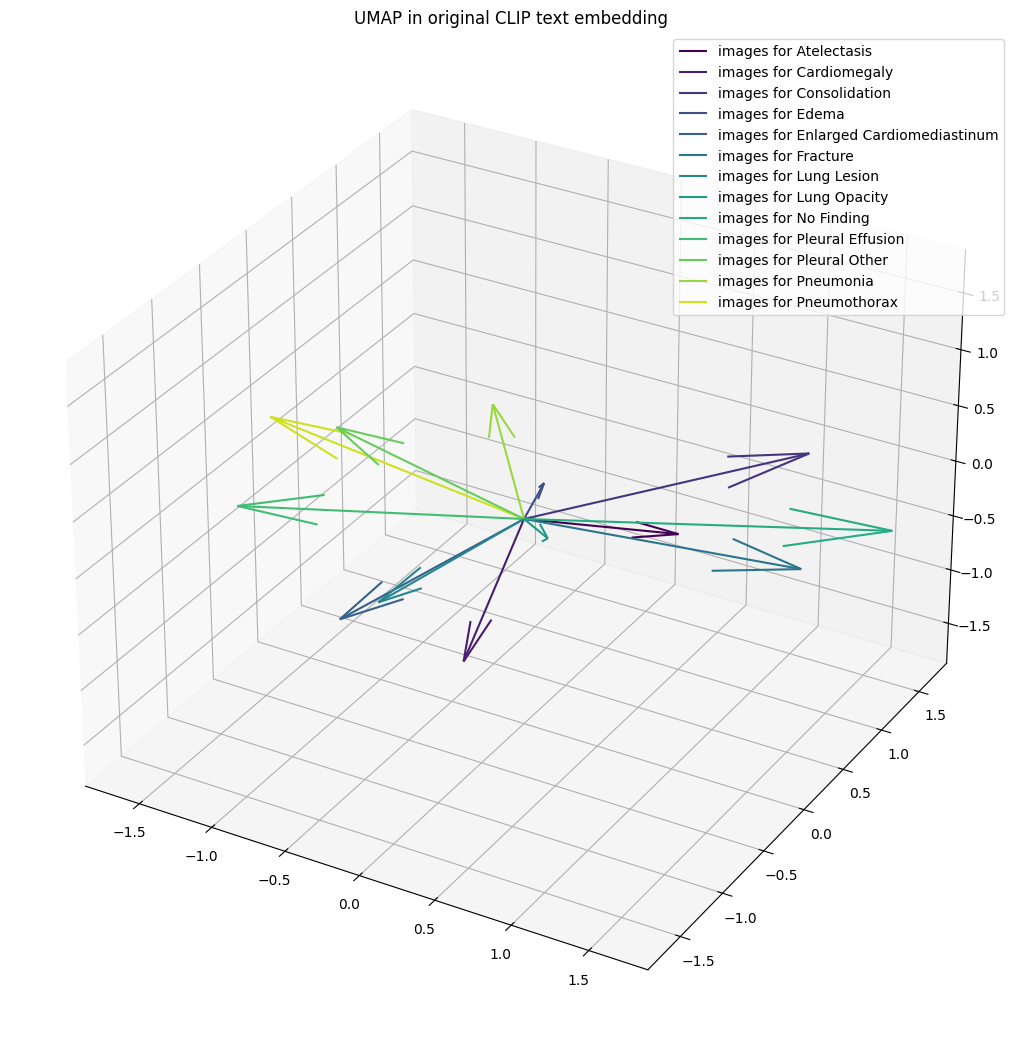

In [6]:
import clip
import constants as _constants_
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


class print_plot_CLIP():
  def __init__(self):
    self.prompt = _constants_.BASIC_PROMPT

  def get_text_embedding(self):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)

    text_inputs = torch.cat([clip.tokenize(f"{c}") for c in self.prompt]).to(device)

    # Calculate features
    print(text_inputs.shape)
    with torch.no_grad():
        text_features = model.encode_text(text_inputs)

    print(text_features.size())
    return text_features

  def plot(self):
    text_features = self.get_text_embedding()
    similarity_matrix = torch.mm(text_features, text_features.t())
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (1 * text_features @ text_features.T)
    print(similarity.shape)
    similarity=similarity.cpu().numpy()
    data = similarity_matrix.cpu().numpy()
    data.shape

    plt.figure(figsize=(8, 5))
    plt.imshow(similarity)
    plt.colorbar()
    plt.yticks(range(13), self.prompt, fontsize=7)
    plt.xticks(range(13), self.prompt, fontsize=7, rotation=40)
    # for i, image in enumerate(text):
    #     plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
    for x in range(similarity.shape[1]):
        for y in range(similarity.shape[0]):
            plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=8)

    for side in ["left", "top", "right", "bottom"]:
      plt.gca().spines[side].set_visible(False)

    # plt.xlim([-0.5, 4 - 0.5])
    # plt.ylim([4 + 0.5, -2])
    avg_sim = (np.sum(similarity) - len(similarity))/(len(similarity) * (len(similarity) - 1))

    plt.title("Cosine similarity between text and text features CLIP TEXT encoder" + f" AVG_SIM: {avg_sim}", size=20)

  def plot_UMAP(self):
    text_features = self.get_text_embedding()


    reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3, random_state=random_seed)
    from sklearn.preprocessing import StandardScaler  # 导入标准化工具
    scaler = StandardScaler()
    text_embedding = scaler.fit_transform(text_features.cpu().detach().numpy())

    embedding = reducer.fit_transform(text_embedding)

    # 计算均值
    mean_x = np.mean(embedding[:, 0])
    mean_y = np.mean(embedding[:, 1])
    mean_z = np.mean(embedding[:, 2])

    # 平移所有点，使原点位于中心
    embedding_centered = embedding - [mean_x, mean_y, mean_z]

    fig = plt.figure(figsize=(19, 13))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_title("UMAP in original CLIP text embedding")

    # 使用 ax.quiver 绘制三维向量
    for i in range(len(embedding)):
        x_start = 0  # 起点 x 坐标
        y_start = 0  # 起点 y 坐标
        z_start = 0  # 起点 z 坐标

        x_vector = embedding_centered[i, 0]  # x 方向上的分量
        y_vector = embedding_centered[i, 1]  # y 方向上的分量
        z_vector = embedding_centered[i, 2]  # z 方向上的分量

        # ax.quiver(x_start, y_start, z_start, x_vector, y_vector, z_vector)
        color = plt.cm.viridis((i) / len(embedding_centered))  # 根据索引设置颜色
        ax.quiver(x_start, y_start, z_start, x_vector, y_vector, z_vector, color=color, label=prompt[i])

        print(x_vector, y_vector, z_vector)

        # ax.text(embedding[i, 0], embedding[i, 1], embedding[i, 2], prompt[i])
    max_range = np.max(np.abs(embedding_centered))
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range ])
    ax.set_zlim([-max_range, max_range])
    ax.legend()
    # plt.grid()
    plt.show()
   

a = print_plot_CLIP()

a.plot()
a.plot_UMAP()

## Conclusion

总的来说，通过损失函数将text embedding相互拉远的操作，总体来看是有效的： BioMedCLIP在原生上就比CLIP对医学文本更加orthogonal。  
在经过模型训练后，Biomed的效果优于CLIP（即使在biomed还未稳定收敛的情况下）

<label>Issues</label>
<ul>
    <li>  经过训练后，Bio version产生的word embedding比起原始Bio生成的结果彼此被拉近了（less orthogonal）  </li>
      <input type="checkbox"> solved --- dug 导致 Othogonal Loss 等于 0 <br>
    <li> 经过训练后的text embedding并没有预想的orthogonal，可能需要修改损失/超参数 </li>
      <input type="checkbox"> solved --- dug 导致 Othogonal Loss 等于 0 <br>
    <li>FG_CLIP模型输出不稳定 --- 需要debug -- 当前怀疑是计算未正则化，导致的计算损失引发的问题</li>
      <input type="checkbox"> solved <br>
</ul>



------
## Loss exploration 

In [29]:
import models 

model = MultiTaskModel(nntype="biomedclip")

# the model class: 你所定义的模型的class
model.load_state_dict(torch.load(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\checkpoint_11_11_bio\10000\pytorch_model.bin"))
# print(model.eval())
prompt = _constants_.BASIC_PROMPT
image_path = ["D:\\exchange\\ShanghaiTech\\learning\\code\\diagnosisP\\x_ray_constrastive\\imgs\\structure.png"]
label = torch.tensor([1,1,2,1,2,1,1,2,1,0,0,2,1])
model.cuda()
contrastive_mode, classifier, orthogonal = model(prompt, image_path, label)
print(contrastive_mode.keys())
print(classifier.keys())
print(orthogonal.keys())
text_embedding = orthogonal['text_embeds']
print(text_embedding.shape)
text_embedding = text_embedding.squeeze()
print(text_embedding.shape)



in current image branch, the vis backbone for vis embedding is: biomedclip
in current Text branch, the text backbone for text embedding is: biomedclip


d:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\models.py:287: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_feature = torch.tensor(text_feature)


dict_keys(['img_embeds', 'text_embeds', 'logits_per_image', 'loss_value'])
dict_keys(['logits', 'loss_value'])
dict_keys(['text_embeds', 'loss_value', 'multi_logits_per_text'])
torch.Size([13, 512])
torch.Size([13, 512])


In [26]:
constrastive_loss = contrastive_mode["loss_value"]
classifier_loss = classifier["loss_value"]
orthogonal_loss = orthogonal["loss_value"]
print(f"the constrastive loss: {constrastive_loss}")
print(f"the classifier loss: {classifier_loss}")
print(f"the orthogonal loss: {orthogonal_loss}")

the constrastive loss: 2.389510154724121
the classifier loss: 1.9724419116973877
the orthogonal loss: 0.05580515414476395


**the loss landscape in arbitrary image and labels**   
| structure | FG+CLIP | FG+BiomedCLIP | preference
| --- | --- | --- | --- |
|the constrastive loss: |2.5125927925109863|   <font color=green>2.402183771133423 </font>|  smaller
|the classifier loss: |1.895163655281067  |  <font color=green>2.0004537105560303</font> | larger(in arbitrary case)
|the orthogonal loss: |1.3862650394439697|<font color=green>0.06821190565824509</font> | smaller

Biomed version get better performance from the table above

In [19]:
model = MultiTaskModel()
image_path = ["D:\\exchange\\ShanghaiTech\\learning\\code\\diagnosisP\\x_ray_constrastive\\imgs\\structure.png"]
label = torch.tensor([1,1,2,1,2,1,1,2,1,0,0,2,1])
model.cuda()
contrastive_mode, classifier, orthogonal = model(prompt, image_path, label)
print(contrastive_mode.keys())
print(classifier.keys())
print(orthogonal.keys())
text_embedding = orthogonal['text_embeds']
print(text_embedding.shape)
text_embedding = text_embedding.squeeze()
print(text_embedding.shape)


dict_keys(['img_embeds', 'text_embeds', 'logits_per_image', 'loss_value', 'logits_per_text'])
dict_keys(['logits', 'loss_value'])
dict_keys(['text_embeds', 'loss_value', 'multi_logits_per_text'])
torch.Size([13, 1, 512])
torch.Size([13, 512])


In [16]:
import models 
from models import MultiTaskModel
import constants as _constants_
import torch

model = MultiTaskModel()

# the model class: 你所定义的模型的class
# model.load_state_dict(torch.load(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\checkpoint_11_4_base\10000\pytorch_model.bin"))
# print(model.eval())
prompt = _constants_.BASIC_PROMPT
image_path = ["D:\\exchange\\ShanghaiTech\\learning\\code\\diagnosisP\\x_ray_constrastive\\imgs\\structure.png"]
label = torch.tensor([1,1,2,1,2,1,1,2,1,0,0,2,1])
model.cuda()
contrastive_mode, classifier, orthogonal = model(prompt, image_path, label)
print(contrastive_mode.keys())
print(classifier.keys())
print(orthogonal.keys())
text_embedding = orthogonal['text_embeds']
print(text_embedding.shape)
text_embedding = text_embedding.squeeze()
print(text_embedding.shape)



# constrastive_loss = contrastive_mode["loss_value"]
# classifier_loss = classifier["loss_value"]
# orthogonal_loss = orthogonal["loss_value"]
# print(f"the constrastive loss: {constrastive_loss}")
# print(f"the classifier loss: {classifier_loss}")
# print(f"the orthogonal loss: {orthogonal_loss}")
# prompt
# print(contrastive_mode["img_embeds"])
# row_means  = torch.mean(contrastive_mode["img_embeds"].squeeze(),axis = 1)
# row_std  = torch.std(contrastive_mode["img_embeds"].squeeze(),axis = 1)
# contrastive_mode["img_embeds"].shape
# print(f"the mean value of each embedding \n{row_means}")
# print(f"the std value of each embedding \n{row_std}")

in current image branch, the vis backbone for vis embedding is: clip
in current Text branch, the text backbone for text embedding is: clip
dict_keys(['img_embeds', 'text_embeds', 'logits_per_image', 'loss_value'])
dict_keys(['logits', 'loss_value'])
dict_keys(['text_embeds', 'loss_value', 'multi_logits_per_text'])
torch.Size([13, 512])
torch.Size([13, 512])


embedding的数据分布有问题， 每一种disease的embedding表征mean趋近于0， std也非常接近于0.

预期 mean->0， std->0.5  : original clip 中embedding数据表征


In [20]:
import torch
import constants as _constants_
import models
torch.cuda.empty_cache()

# torch.cuda.set_per_process_memory_fraction(0.8)?
prompt = _constants_.BASIC_PROMPT
image_path = ["D:\\exchange\\ShanghaiTech\\learning\\code\\diagnosisP\\x_ray_constrastive\\imgs\\structure.png"]
label = torch.tensor([1,1,2,1,2,1,1,2,1,0,0,2,1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 1  #批处理大小
input_shape = (3, 244, 384)   #输入数据,改成自己的输入shape

# #set the model to inference mode

model_1 = models.MultiTaskModel(nntype="biomedclip")
model_1.cuda()
model_1.eval()
torch.cuda.memory_summary(device=None, abbreviated=False)

export_onnx_file = "test.onnx"		# 目的ONNX文件名
# prompt, image_path, label = prompt.to("cpu"), image_path.to("cpu"), label.to("cpu")

torch.onnx.export(model_1,
                    (prompt, image_path, label),
                    export_onnx_file,
                    opset_version=10,
                    do_constant_folding=True,	# 是否执行常量折叠优化
                    # input_names=["input"],	# 输入名
                    output_names=["output"],	# 输出名
                    dynamic_axes={"input":{0:"batch_size"},  # 批处理变量
                                    "output":{0:"batch_size"}})


in current image branch, the vis backbone for vis embedding is: biomedclip
in current Text branch, the text backbone for text embedding is: biomedclip
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "e:\Anaconda\envs\biomedCLIP\lib\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_21360\3701358118.py", line 18, in <module>
    model_1.cuda()
  File "e:\Anaconda\envs\biomedCLIP\lib\site-packages\torch\nn\modules\module.py", line 688, in cuda
  File "e:\Anaconda\envs\biomedCLIP\lib\site-packages\torch\nn\modules\module.py", line 578, in _apply
    raise KeyError(f"attribute '{name}' already exists")
  File "e:\Anaconda\envs\biomedCLIP\lib\site-packages\torch\nn\modules\module.py", line 578, in _apply
    raise KeyError(f"attribute '{name}' already exists")
  File "e:\Anaconda\envs\biomedCLIP\lib\site-packages\torch\nn\modules\module.py", line 578, in _apply
    raise KeyError(f"attribute '{name}' already exists")
  [Previous line repeated 6 more times]
  File "e:\Anaconda\envs\biomedCLIP\lib\site-packages\to

In [11]:
!pip install torch --upgrade